# Monte Carlo Simulation

This notebook provides a brief introduction to the technique of Monte Carlo simulation. Adapted from https://en.wikipedia.org/wiki/Monte_Carlo_method (accessed 1/1/2019):

> Monte Carlo methods (or Monte Carlo experiments) are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results. Their essential idea is using randomness to solve problems that might be deterministic in principle. They are often used in physical and mathematical problems and are most useful when it is difficult or impossible to use other approaches. Monte Carlo methods are mainly used in three problem classes: optimization, numerical integration, and generating draws from a probability distribution.
>
> In principle, Monte Carlo methods can be used to solve any problem having a probabilistic interpretation. By the law of large numbers, integrals described by the expected value of some random variable can be approximated by taking the empirical mean (a.k.a. the sample mean) of independent samples of the variable. When the probability distribution of the variable is parametrized, mathematicians often use a Markov chain Monte Carlo (MCMC) sampler. The central idea is to design a judicious Markov chain model with a prescribed stationary probability distribution. That is, in the limit, the samples being generated by the MCMC method will be samples from the desired (target) distribution. By the ergodic theorem, the stationary distribution is approximated by the empirical measures of the random states of the MCMC sampler.
>
> Monte Carlo simulations sample from a probability distribution for each variable to produce hundreds or thousands of possible outcomes. The results are analyzed to get probabilities of different outcomes occurring. For example, a comparison of a spreadsheet cost construction model run using traditional “what if” scenarios, and then running the comparison again with Monte Carlo simulation and triangular probability distributions shows that the Monte Carlo analysis has a narrower range than the “what if” analysis. This is because the “what if” analysis gives equal weight to all scenarios (see quantifying uncertainty in corporate finance), while the Monte Carlo method hardly samples in the very low probability regions. The samples in such regions are called "rare events".

Essentially, Monte Carlo simulation allows us to better understand the distribution of a metric of interest when the metric is defined by a complex function of random variables. As an example, we will consider a production environment where jobs must be processed sequentially on multiple machines. Since our objective is to demonstrate Monte Carlo simulation, we will try to answer the question:

> **If jobs never had to wait for a machine to become available, what is the distribution for the total completion time of a job, i.e., the time it takes to process the job on all machines?**

Assume that there are five machines. Moreover, assume that:
- The processing time on machine 1 follows a Uniform distribution that ranges between 50 and 75 seconds,
- The processing time on machine 2 follows a Normal distribution with a mean of 70 seconds and a standard deviation of 10 seconds,
- The processing time on machine 3 follows a Triangular distribution with minimum, most likely, and maximum values of 45 seconds, 60 seconds, and 90 seconds, respectively,
- The processing time on machine 4 follows a Uniform distribution that ranges between 120 and 180 seconds, and
- The processing time on machine 5 follows a Triangular distribution with minimum, most likely, and maximum values of 25 seconds, 50 seconds, and 60 seconds, respectively.

Given the different processing time distributions for each machine, it would be very difficult to derive the total processing time distribution directly. Instead, we will generate a large number of possible *sample paths*, and use them to deduce the total processing time distribution. The following code block imports a couple of packages that we will use for our demonstration.

In [1]:
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt

The following code block uses NumPy to generate a random sample of 1000 points that follow the processing time distribution for machine 1. The sample is plotted using a histogram.

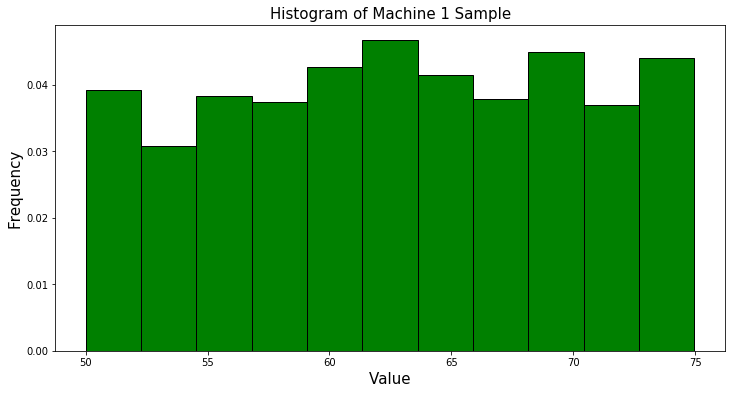

In [2]:
size = 1000

M1_sample = np.random.uniform(low = 50.0, high = 75.0, size = size)

fig, ax = plt.subplots(1, 1, figsize = (12, 6))

ax.hist(M1_sample, 
        bins = 'auto', 
        edgecolor = 'k', 
        color = 'g', 
        density = True)
ax.set_xlabel('Value', fontsize = 15)
ax.set_ylabel('Frequency', fontsize = 15)
ax.set_title('Histogram of Machine 1 Sample', fontsize = 15)

plt.show()

The following code blocks generate and plot similar samples for the remaining machines.

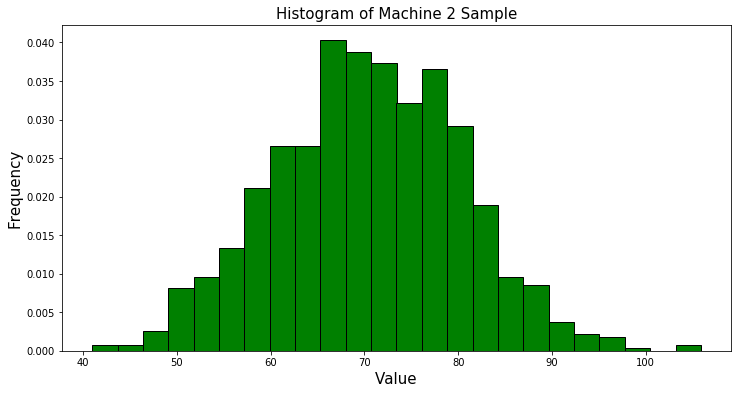

In [3]:
M2_sample = np.random.normal(loc = 70.0, scale = 10.0, size = size)

fig, ax = plt.subplots(1, 1, figsize = (12, 6))

ax.hist(M2_sample, 
        bins = 'auto', 
        edgecolor = 'k', 
        color = 'g', 
        density = True)
ax.set_xlabel('Value', fontsize = 15)
ax.set_ylabel('Frequency', fontsize = 15)
ax.set_title('Histogram of Machine 2 Sample', fontsize = 15)

plt.show()

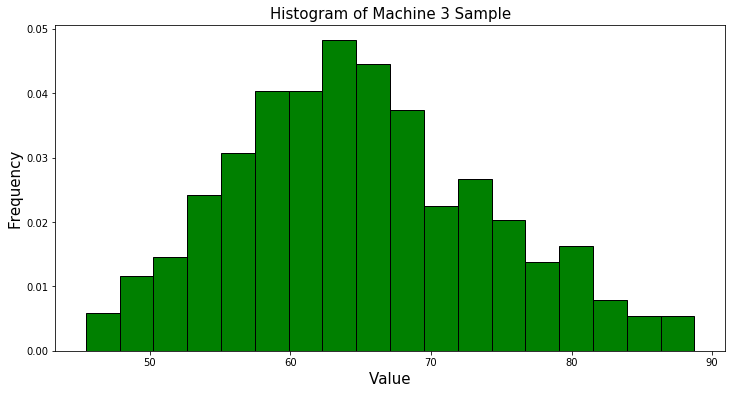

In [4]:
M3_sample = np.random.triangular(left = 45, mode = 60, right = 90, size = size)

fig, ax = plt.subplots(1, 1, figsize = (12, 6))

ax.hist(M3_sample, 
        bins = 'auto', 
        edgecolor = 'k', 
        color = 'g',
        density = True)
ax.set_xlabel('Value', fontsize = 15)
ax.set_ylabel('Frequency', fontsize = 15)
ax.set_title('Histogram of Machine 3 Sample', fontsize = 15)

plt.show()

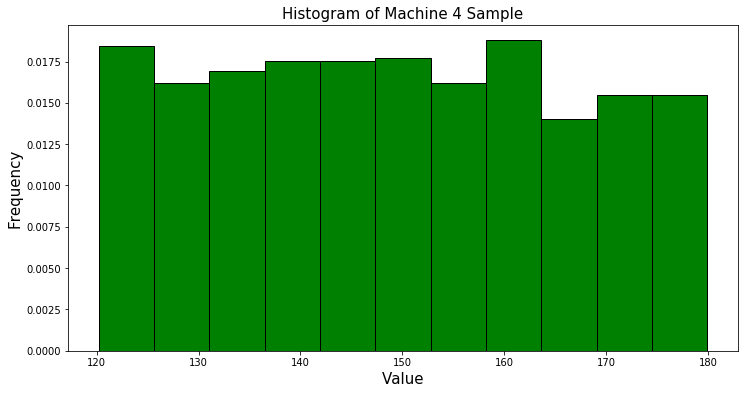

In [5]:
M4_sample = np.random.uniform(low = 120.0, high = 180.0, size = size)

fig, ax = plt.subplots(1, 1, figsize = (12, 6))

ax.hist(M4_sample, 
        bins = 'auto', 
        edgecolor = 'k', 
        color = 'g',
        density = True)
ax.set_xlabel('Value', fontsize = 15)
ax.set_ylabel('Frequency', fontsize = 15)
ax.set_title('Histogram of Machine 4 Sample', fontsize = 15)

plt.show()

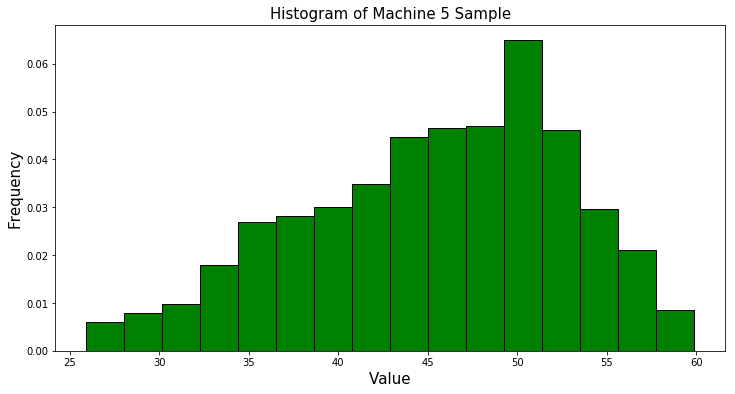

In [6]:
M5_sample = np.random.triangular(left = 25, mode = 50, right = 60, size = size)

fig, ax = plt.subplots(1, 1, figsize = (12, 6))

ax.hist(M5_sample, 
        bins = 'auto', 
        edgecolor = 'k', 
        color = 'g',
        density = True)
ax.set_xlabel('Value', fontsize = 15)
ax.set_ylabel('Frequency', fontsize = 15)
ax.set_title('Histogram of Machine 5 Sample', fontsize = 15)

plt.show()

So, we have generated samples for the processing time on each machine and stored them in NumPy array objects. Thus, adding the array objects together provides a new array that includes 1000 samples of the total processing time for a single job. This summed array is created and plotted in the following code block.

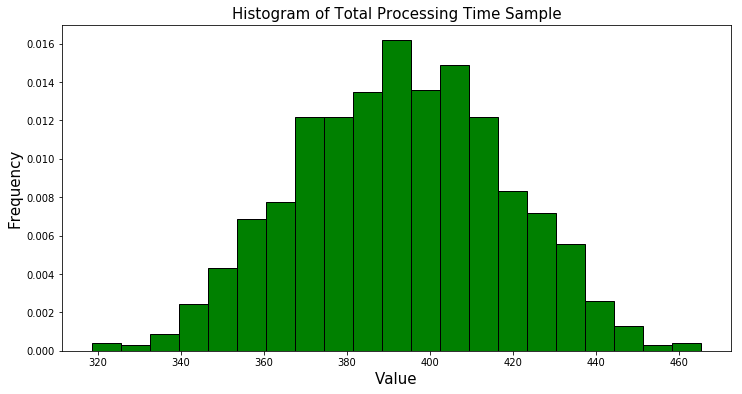

In [7]:
total_pt_sample = M1_sample + M2_sample + M3_sample + M4_sample + M5_sample

fig, ax = plt.subplots(1, 1, figsize = (12, 6))

ax.hist(total_pt_sample, 
        bins = 'auto', 
        edgecolor = 'k', 
        color = 'g', 
        density = True)
ax.set_xlabel('Value', fontsize = 15)
ax.set_ylabel('Frequency', fontsize = 15)
ax.set_title('Histogram of Total Processing Time Sample', fontsize = 15)

plt.show()

We can now use NumPy to answer various questions about the total processing time distribution.

In [8]:
print(f'We expect the total processing time to range from {total_pt_sample.min()} seconds\
to {total_pt_sample.max()} seconds, with a mean of {total_pt_sample.mean()} seconds.\n')

print(f'There is a 10% chance that the total processing time is less than {np.percentile(total_pt_sample, 10)} seconds.\n')

print(f'There is a 10% chance that the total processing time is greater than {np.percentile(total_pt_sample, 90)} seconds.\n')

We expect the total processing time to range from 318.643216150204 secondsto 465.34883227832023 seconds, with a mean of 392.94164707203095 seconds.

There is a 10% chance that the total processing time is less than 359.4045708655713 seconds.

There is a 10% chance that the total processing time is greater than 426.71032538900045 seconds.



 The following code block provides an interactive plot that allows us to see how the resulting distribution changes as we increase the size of the samples we generate for each machine.

In [9]:
from ipywidgets import interact
@interact(size=[10, 100, 1000, 10000, 100000, 1000000])

def vary_sample_size(size = 10):

    np.random.seed(0)
    M1_sample = np.random.uniform(low = 50.0, high = 75.0, size = size)
    M2_sample = np.random.normal(loc = 70.0, scale = 10.0, size = size)
    M3_sample = np.random.triangular(left = 45, mode = 60, right = 90, size = size)
    M4_sample = np.random.uniform(low = 120.0, high = 180.0, size = size)
    M5_sample = np.random.triangular(left = 25, mode = 50, right = 60, size = size)
    
    total_pt_sample = M1_sample + M2_sample + M3_sample + M4_sample + M5_sample

    fig, ax = plt.subplots(1, 1, figsize = (12, 6))

    ax.hist(total_pt_sample, 
            bins = 'auto', 
            edgecolor = 'k', 
            color = 'g',
            density = True)
    ax.set_xlabel('Value', fontsize = 15)
    ax.set_ylabel('Frequency', fontsize = 15)
    ax.set_title('Histogram of Total Processing Time Sample', fontsize = 15)

    plt.show()


interactive(children=(Dropdown(description='size', options=(10, 100, 1000, 10000, 100000, 1000000), value=10),…

We can also use the distribution fitting methods described in the notebook on distribution fitting to generate a sample from the sampled distribution. 